결정트리(Decision Tree) : 연봉 예측

목표: 학력, 교육 연수, 혼인 상태, 직업 정보를 담은 연봉 데이터셋을 활용해 연봉을 예측

via 최효원's Jupyter Notebook

종속 변수가 class(연봉 $50000 이상 or $50000 이하) 로 이루어진 민간인 데이터셋입니다.
학력, 혼인 상태, 직업 등의 독립 변수를 활용해 민간인의 연봉 예측 모델링 작업을 진행했습니다.

예측력, 성능으로 따지면 decision tree 알고리즘을 사용할 일은 없지만,
트리 그래프를 통한 탁월한 시각화, 다양한 트리 모델의 baseline 으로써
학습의 필요성을 느껴 해당 작업에 적용했습니다.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#라이브러리 import
df = pd.read_csv('https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv',\
                skipinitialspace = True)
#데이터 출처 : https://media.githubusercontent.com/media/musthave-ML10
#skipinitialspace -> 데이터 맨 앞자리 공란 제거
df.head()
#연령 #고용형태(o) #학력(o) #교육연수 #혼인상태(o) #직업(o) #가족관계(o) #인종(o)
#성별(o) #자산증가 #자산감소 #주당 노동 시간 #본국(o) #연봉 구분(o, target)
#object 변수 -> o 로 마킹

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df['class'].unique()
#target 고윳값 확인

array(['<=50K', '>50K'], dtype=object)

In [9]:
df.info()
#total : 48842 rows / 14 cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


*범주형 변수가 많고, non-null count 를 확인했을 때
결측치가 있는 변수가 약간 있는 것을 확인했습니다.

In [10]:
df.describe(include = 'all').T
#데이터 통계 정보(object  변수 포함)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,46043,8,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,46033,14,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital-gain,48842.0,NaN,NaN,NaN,1079.067626,7452.019058,0.0,0.0,0.0,0.0,99999.0


In [11]:
df['class'] = df['class'].map({'<=50K':0, '>50K':1})
#target 변수 총 두개를 숫자 변환
#<=50K : 0, >50K : 1

In [13]:
for i in df.columns:
    print(i, df[i].dtype)
#컬럼명, 데이터 타입 출력

age int64
workclass object
education object
education-num int64
marital-status object
occupation object
relationship object
race object
sex object
capital-gain int64
capital-loss int64
hours-per-week int64
native-country object
class int64


In [14]:
obj = []
for i in df.columns:
    #순회
    if df[i].dtype == 'object':
        #데이터타입이 object 이면,
        obj.append(i)
        #리스트에 변수 이름 추가

obj

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

*값 종류가 10개 미만의 object 변수 -> 더미 변환
10개 이상 object 변수 -> feature engineering 필요한지 검토하는 작업을 진행했습니다.
(값 종류 만큼 새로운 더미 변수가 생겨나므로, 너무 많은 변수 생성 방지 목적)

In [16]:
for i in obj:
    if df[i].nunique() >= 10:
        print(i, df[i].nunique())

education 16
occupation 14
native-country 41


In [17]:
#education 변수 전처리

df['education'].value_counts()
#고윳값 출현 빈도 확인

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

*데이터프레임에서 'education-num' 변수가 education 정보를 숫자로 표현한 것으로 추측됩니다.
숫자가 서열순으로 기재돼있는지 확인했습니다.

In [18]:
np.sort(df['education-num'].unique())
#education-num 고윳값을 오름차순으로 확인

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [20]:
df[df['education-num'] == 1]['education'].unique()
#education-num 이 1인 데이터들의 education 변수 고윳값을 확인

array(['Preschool'], dtype=object)

In [21]:
for i in np.sort(df['education-num'].unique()):
    #순회
    print(i, df[df['education-num'] == i]['education'].unique())
    #education_num 의 고윳값별 education 변수의 고윳값 확인

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


*기대했던 형태의 결과이므로, 별도 작업 없이 education 변수를 drop 작업을 진행했습니다.

In [22]:
df.drop('education', axis = 1, inplace = True)

In [23]:
#occupation 변수 전처리

df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

*확인 결과, 별도 작업 없이 추후 더미 변수 처리하는 것으로 판단했습니다.

In [24]:
#native-country 변수 전처리

df['native-country'].value_counts()
#고윳값 출현 빈도 확인

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

*United-States 가 압도적으로 큰 비중을 차지하는 것을
확인했습니다(43832).

In [26]:
df.groupby('native-country').mean().sort_values('class')
#그룹별 평균 계산 후 class 기준으로 오름차순 정렬

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


In [27]:
group = df.groupby('native-country').mean()['class']
#그룹별 class 의 평균값을 계산하여 'group' 변수에 저장

In [28]:
group

native-country
Cambodia                      0.321429
Canada                        0.346154
China                         0.295082
Columbia                      0.047059
Cuba                          0.246377
Dominican-Republic            0.048544
Ecuador                       0.133333
El-Salvador                   0.070968
England                       0.370079
France                        0.421053
Germany                       0.281553
Greece                        0.367347
Guatemala                     0.034091
Haiti                         0.120000
Holand-Netherlands            0.000000
Honduras                      0.100000
Hong                          0.266667
Hungary                       0.315789
India                         0.410596
Iran                          0.372881
Ireland                       0.297297
Italy                         0.323810
Jamaica                       0.141509
Japan                         0.347826
Laos                          0.086957
Mexico    

In [30]:
sample = pd.DataFrame({'var_1':[3,5,7], 'var_2':[2,4,6]}, index = ['a','b','c'])
sample.reset_index()

,index,var_1,var_2
0,a,3,2
1,b,5,4
2,c,7,6


In [32]:
#국가 이름을 키값으로 사용하기 위해 국가 이름을 변수로 변환
group = group.reset_index()
group

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [33]:
df = df.merge(group, on = 'native-country', how = 'left')
#'native-country' 변수 기준으로 left join
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0.243977


*기존 data 의 class 변수, engineering 작업 중 생성한 'group' 변수에 class 변수가
이름이 겹치는 이유로 class_x, class_y 변수가 생성됐습니다.
class_x -> 기존 데이터 class 로 사용
class_y -> 'native_country' 변수 대신 활용하는 방식으로 작업을 진행했습니다.

In [34]:
df.drop('native-country', axis = 1, inplace = True)
df = df.rename(columns = {'class_x': 'class', 'class_y':'native-country'})
df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,class,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,0,0.243977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,0,0.243977
48838,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,1,0.243977
48839,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,0,0.243977
48840,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,0,0.243977


In [35]:
df.isna().mean()
#결측치 비율 확인[workclass(o), occupation(o), native-country]
#o -> object 변수

age               0.000000
workclass         0.057307
education-num     0.000000
marital-status    0.000000
occupation        0.057512
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
class             0.000000
native-country    0.017546
dtype: float64

*선형 모델에서는 데이터 왜곡을 불러일으킬 수 있지만,
해당 작업에서는 트리 기반 모델을 적용할 예정이므로 결측치를 -99로 대체했습니다.

In [37]:
df['native-country'] = df['native-country'].fillna(-99)

In [38]:
df['workclass'].value_counts()
#workclass 고윳값별 출현 빈도 확인

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [39]:
df['workclass'] = df['workclass'].fillna('Private')
#private 비율이 압도적이므로, 결측치를 private 으로 대체했습니다.

In [40]:
df['occupation'].value_counts()
#occupation 고윳값별 출현 빈도 확인

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [41]:
#어떤 특정값이 압도적으로 많다고 보기 어려우므로, 별도 text 'Unknown' 으로 대체했습니다.
df['occupation'] = df['occupation'].fillna('Unknown')

In [42]:
df = pd.get_dummies(df, drop_first = True)
#전체 변수 더미 변환

In [43]:
from sklearn.model_selection import train_test_split
#학습, 데이터셋 분할

xtr,xt,ytr,yt = train_test_split(df.drop('class', axis = 1), df['class'], test_size = 0.4, random_state = 100)

In [44]:
from sklearn.tree import DecisionTreeClassifier
#의사결정나무 분류기 import(분류예측)

dt = DecisionTreeClassifier()
dt.fit(xtr, ytr)
#학습
pred = dt.predict(xt)
#예측

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(yt, pred)
#정확도 계산

0.8166043916670932

*결정 트리에서 매개변수를 지정하지 않으면, 최대한 깊은 수준으로 트리를 만들어냅니다.
트리 깊이가 깊어질수록, 많은 노드를 분류하여 overfitting 위험이 있으므로,
하이퍼파라미터 조정 작업을 진행했습니다.

In [47]:
dt = DecisionTreeClassifier(max_depth = 7)
dt.fit(xtr, ytr)
train_pred = dt.predict(xtr)
test_pred = dt.predict(xt)
print(accuracy_score(ytr, train_pred))
print(accuracy_score(yt, test_pred))

0.8598532673605187
0.8540717612734811


*주어진 데이터에 따라 최적의 max_depth 값은 다르고,
max_depth = 7 일때, 학습 & 테스트 데이터셋의 가장 높은 정확도가 확인됐습니다.

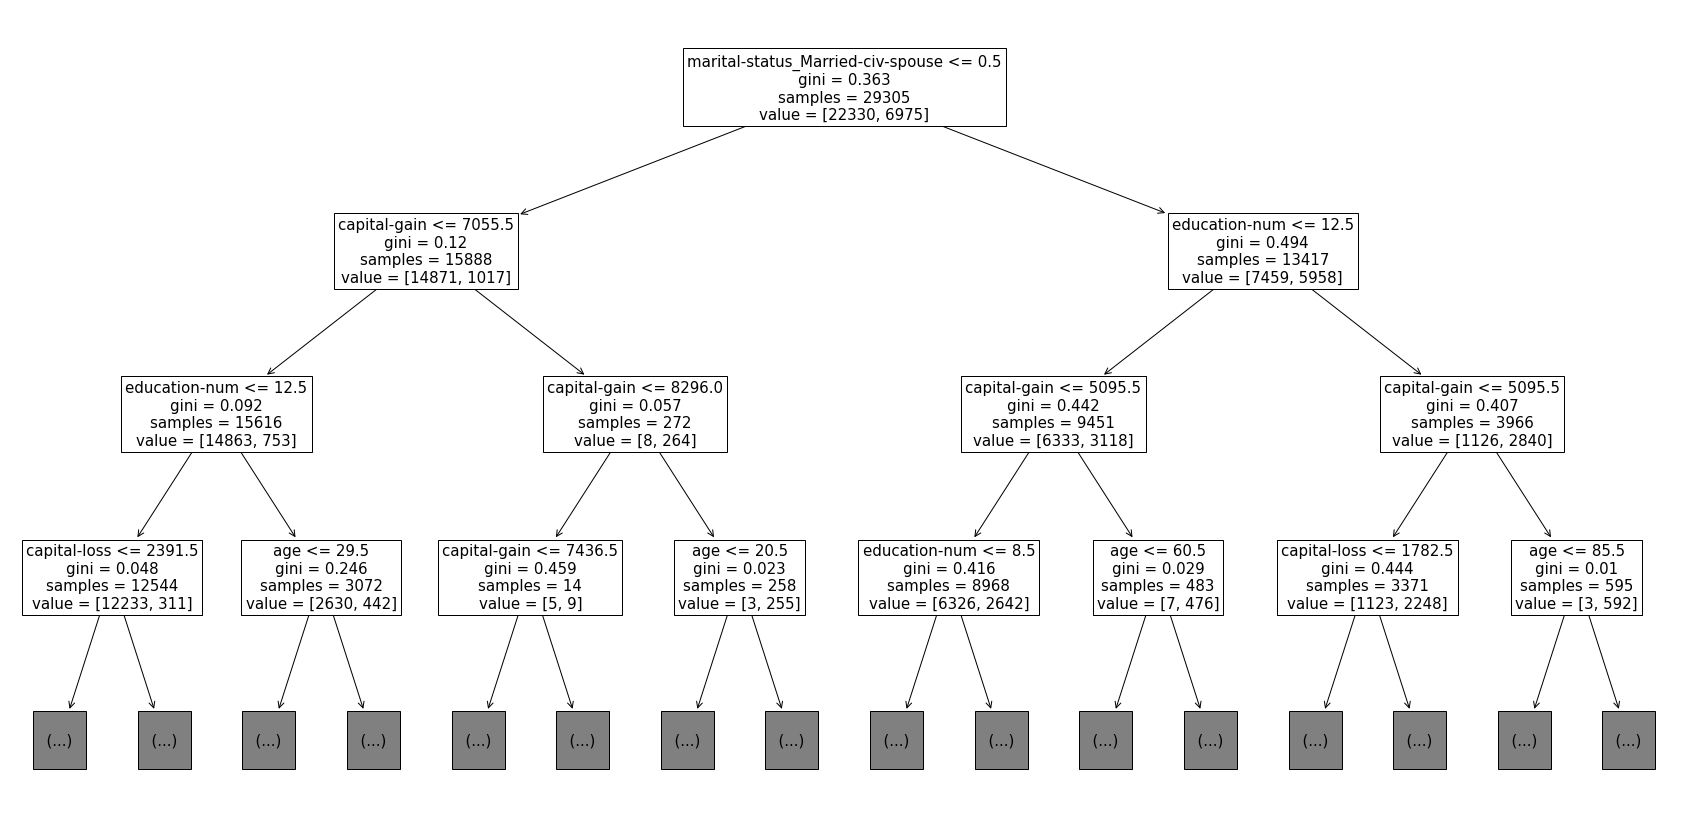

In [50]:
from sklearn.tree import plot_tree
#사이킷런의 tree 를 활용한 시각화(import)

plt.figure(figsize = (30,15))
plot_tree(dt, max_depth = 3, fontsize = 15, feature_names = xtr.columns)
#변수 이름을 추가해 그래프 출력
plt.show()

*최종 max_depth = 7 이 최적화된 모델로 선택됐지만, 시각화 작업이 원활하지 않아
해당 작업에서 max_depth = 3 로 진행했습니다.
첫줄 - marital-status_married-civ-spouse <= 0.5 기준으로 분할
(marital-status 에서 더미로 파생된 변수)
혼인 상태가 married-civ-spouse 에 해당하는지 아닌지가 가장 중요한 변수로 뽑힌 것을 확인할 수 있었습니다.